<a href="https://colab.research.google.com/github/cecilia-wanja/An-analysis-of-electric-cars/blob/master/Moringa_Data_Science_Core_W3_Independent_Project_2019_23rd_Cecilia_Gichohi_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QUESTION

To identify some areas and periods of interest via sampling, stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. The selected periods of interest be either weekdays or weekends but not a mix of both. You can also consider postal codes 75015 vs 75017 to some of the areas of interest. 

# HYPOTHESIS

H0 :Is the number of Bluecars taken in area X different than in area Y? Is it greater in area X than in area Z?

## METRICS OF SUCCESS

1. Find and deal with outliers, anomalies, and missing data within the dataset.

2. Plot univariate and bivariate summaries recording our observations.

3. Implement the solution by performing the respective analysis i.e. reduction, modeling, etc.

4. Challenge our solution by providing insights on how we can make improvements.

#UNDERSTANDING OUR DATASET

The dataset provided gives us insights on a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging).

# EXPERIMENTAL DESIGN

We will use a systematic format.Tis is by cleaning the data, performing univariate, bivariate and finally multivariate analysis.

# APPROPRIATENESS OF DATA

In this project, we need to identify some areas and periods of interest via sampling.This includes the data for the respective cars,the number used and returned etc.This dataset provides all that.

In [0]:
#IMPORTING THE NECESSARY LIBRARIES

#importing pandas
import pandas as pd

#importing numpy
import numpy as np

#importing seaborn
import seaborn as sns

#importing matplotlib package
import matplotlib.pyplot as py
%matplotlib inline

#importing scipy
from scipy import stats

#importing ttest_1samp
from scipy.stats import ttest_1samp

#importing ttest_ind
from scipy.stats import ttest_ind

#importing pandas profiling
import pandas_profiling as pp

from IPython.display import display

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [97]:
#We first need to retrieve our data
autolib = pd.read_csv("/content/autolib_daily_events_postal_code.csv")
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


#1. CLEANING 


In [98]:
#previewing the bottom part of our data
autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [99]:
#the statistical values of each row
autolib.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [100]:
#the datset information of each column
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               16085 non-null int64
date                      16085 non-null object
n_daily_data_points       16085 non-null int64
dayOfWeek                 16085 non-null int64
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [101]:
#getting number of rows and columns
autolib.shape

(16085, 13)

In [102]:
#getting my column names
autolib.columns.values

array(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek',
       'day_type', 'BlueCars_taken_sum', 'BlueCars_returned_sum',
       'Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum',
       'Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum'],
      dtype=object)

In [103]:
#getting individual column datatypes
autolib.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [0]:
#unifying my column names
autolib.columns = autolib.columns.str.replace(" ", "").str.lower()

In [105]:
pp.ProfileReport(autolib)

Number of variables,13
Number of observations,16085
Total Missing (%),0.0%
Total size in memory,1.6 MiB
Average record size in memory,104.0 B
Numeric,5
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,6


In [106]:
#finding my postal code values
autolib.postalcode.unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

In [107]:
#checking for outliers
autolib.isnull().sum()

postalcode                0
date                      0
n_daily_data_points       0
dayofweek                 0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

our dataset has no outliers

In [108]:
#checking for duplicates
autolib.duplicated().sum()
#there are no duplicated values in our dataset.

0

# SAMPLING


The sampling method in use is Simple Random Sampling to give each dataset attribute a fair chance of being selected.

In [109]:
autolib.shape

(16085, 13)

In [110]:
autolibnew = autolib.sample(n = 2000, replace = 'False')
autolibnew

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
14461,94230,4/5/2018,1440,3,weekday,35,37,6,5,1,3,0,0
9666,92700,1/12/2018,1439,4,weekday,103,95,4,4,9,6,0,0
12036,93400,1/1/2018,1440,0,weekday,106,117,12,11,9,11,0,0
14942,94410,4/18/2018,1377,2,weekday,21,19,1,0,0,0,0,0
1015,75007,3/24/2018,1440,5,weekend,375,389,16,14,19,19,167,177
12284,93440,4/10/2018,1440,1,weekday,0,1,1,0,0,0,0,0
6636,92240,4/1/2018,1440,6,weekend,91,96,2,2,7,7,0,0
14958,94410,5/4/2018,1435,4,weekday,25,16,0,0,2,2,0,0
2934,75019,5/21/2018,1440,0,weekday,545,584,30,29,27,28,136,145
1881,75013,1/10/2018,1440,2,weekday,463,459,12,12,56,51,119,115


In [111]:
autolibnew.shape

(2000, 13)

# UNIVARIATE ANALYSIS

Univariate analysis involves analysis of single variables.In this case, all the columns.

We will group the sample by the day type, postalcode and bluecars taken sum.

In [112]:
autolibnew.groupby(['day_type','postalcode','bluecars_taken_sum']).count().sort_values(by='day_type',ascending=False)

date  ...  slots_taken_sum
day_type postalcode bluecars_taken_sum        ...                 
weekend  95880      39                     1  ...                1
         92140      48                     1  ...                1
         92110      25                     1  ...                1
                    28                     1  ...                1
                    37                     1  ...                1
         92130      242                    1  ...                1
                    249                    1  ...                1
                    254                    1  ...                1
                    257                    1  ...                1
                    271                    1  ...                1
                    280                    1  ...                1
                    282                    1  ...                1
                    291                    1  ...                1
                    309                    1  ...                1
                    321                    1  ...                1
         92140      81                     1  ...                1
         92110      21                     2  ...                2
         92140      84                     1  ...                1
                    91                     1  ...                1
                    106                    1  ...                1
                    107                    1  ...                1
                    136                    1  ...                1
         92150      126                    1  ...                1
                    148                    1  ...                1
                    165                    1  ...                1
                    190                    1  ...                1
         92160      31                     4  ...                4
                    33                     1  ...                1
                    41                     1  ...                1
                    42                     1  ...                1
...                                      ...  ...              ...
weekday  92260      35                     2  ...                2
                    33                     2  ...                2
                    31                     1  ...                1
                    30                     1  ...                1
         92290      18                     1  ...                1
                    21                     1  ...                1
         92310      54                     2  ...                2
         92300      102                    1  ...                1
         92310      53                     1  ...                1
                    52                     1  ...                1
                    50                     2  ...                2
                    47                     1  ...                1
                    46                     1  ...                1
                    45                     1  ...                1
                    41                     1  ...                1
                    40                     1  ...                1
         92300      192                    1  ...                1
                    190                    1  ...                1
                    186                    1  ...                1
                    173                    2  ...                2
                    168                    1  ...                1
                    166                    2  ...                2
                    163                    1  ...                1
                    158                    1  ...                1
                    156                    1  ...                1
                    152                    1  ...                1
                    147                    1  ...                1
                    

In [113]:
#selecting the element weekday in day type column to test my hypothesis.
df = autolibnew[autolibnew['day_type'] == "weekday"]
df.head()

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
14461,94230,4/5/2018,1440,3,weekday,35,37,6,5,1,3,0,0
9666,92700,1/12/2018,1439,4,weekday,103,95,4,4,9,6,0,0
12036,93400,1/1/2018,1440,0,weekday,106,117,12,11,9,11,0,0
14942,94410,4/18/2018,1377,2,weekday,21,19,1,0,0,0,0,0
12284,93440,4/10/2018,1440,1,weekday,0,1,1,0,0,0,0,0


In [114]:
#confirming if the unique values in day type is weekday only
df.day_type.unique()

array(['weekday'], dtype=object)

In [0]:
#bluecars_returned_sum is highly correlated with bluecars_taken_sum (ρ = 0.99866) Rejected
#date has a high cardinality: 156 distinct values Warning
#dayofweek has 2374 / 14.8% zeros Zeros
#slots_freed_sum is highly correlated with bluecars_returned_sum (ρ = 0.94826) Rejected
#slots_taken_sum is highly correlated with slots_freed_sum (ρ = 0.99922) Rejected
#utilib_14_returned_sum is highly correlated with utilib_14_taken_sum (ρ = 0.99206) Rejected
#utilib_14_taken_sum is highly correlated with bluecars_returned_sum (ρ = 0.94054) Rejected
#utilib_returned_sum is highly correlated with utilib_taken_sum (ρ = 0.98198) Rejected
#utilib_taken_sum has 5442 / 33.8% zeros Zeros

The following data was collected from the profiling of the autolib data.
Hence we will use the following columns: 

bluecars_returned_sum

slots_taken_sum

dayofweek

postalcode


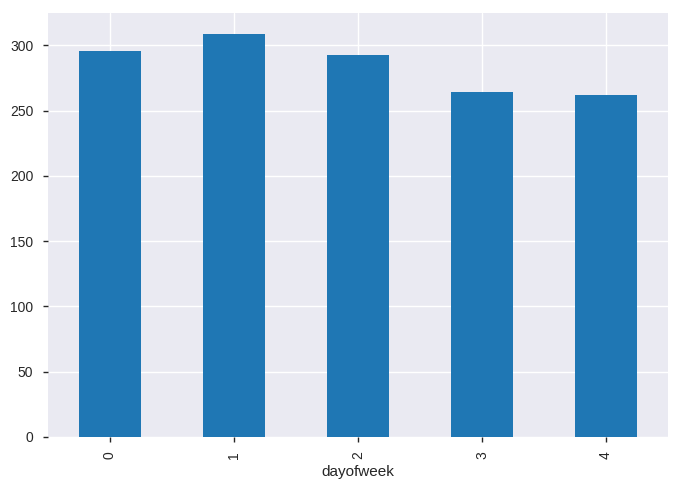

In [116]:
df.groupby("dayofweek")["dayofweek"].count().plot(kind = 'bar')

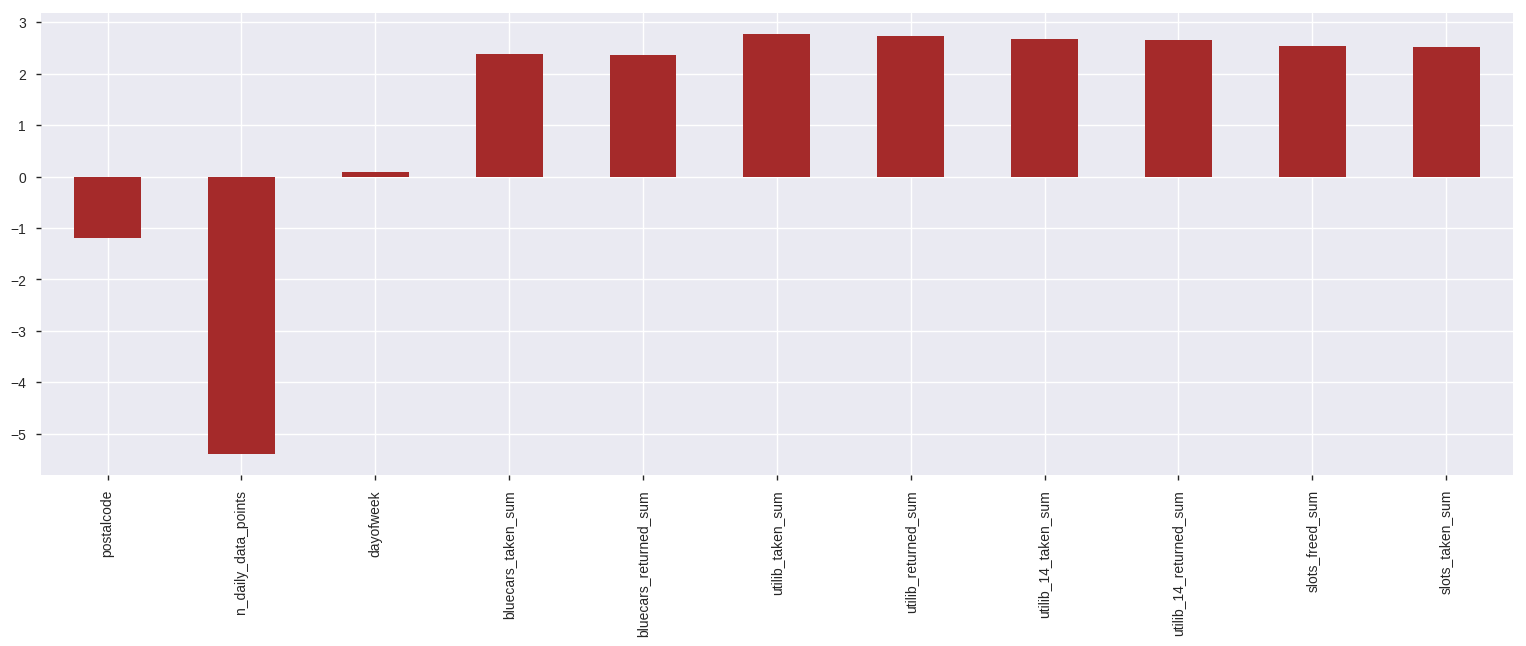

In [117]:
df.skew().plot.bar(figsize =(19,6), color = 'brown')

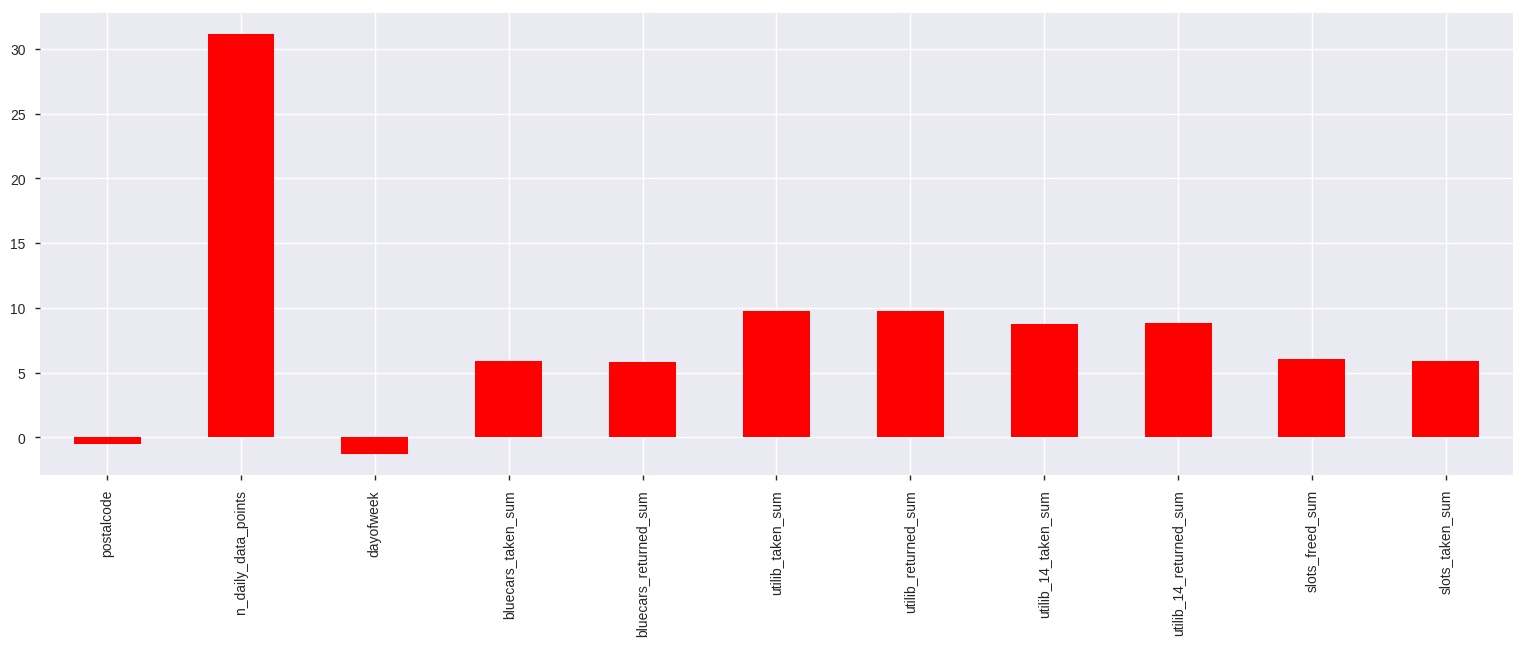

In [118]:
df.kurt().plot.bar(figsize =(19,6), color = 'red')

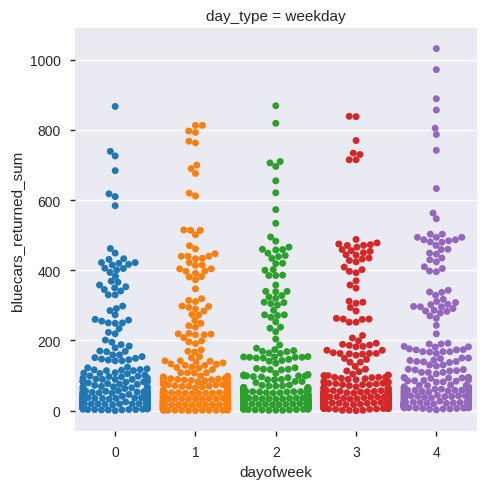

In [119]:
sns.catplot(x = "dayofweek", y = "bluecars_returned_sum", col = "day_type", kind = "swarm", data = df)

In [120]:
df.groupby('postalcode').count().head(20)

,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
postalcode,,,,,,,,,,,,
75001,15,15,15,15,15,15,15,15,15,15,15,15
75002,11,11,11,11,11,11,11,11,11,11,11,11
75003,19,19,19,19,19,19,19,19,19,19,19,19
75004,12,12,12,12,12,12,12,12,12,12,12,12
75005,13,13,13,13,13,13,13,13,13,13,13,13
75006,7,7,7,7,7,7,7,7,7,7,7,7
75007,16,16,16,16,16,16,16,16,16,16,16,16
75008,13,13,13,13,13,13,13,13,13,13,13,13
75009,14,14,14,14,14,14,14,14,14,14,14,14


In [121]:
df.head()

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
14461,94230,4/5/2018,1440,3,weekday,35,37,6,5,1,3,0,0
9666,92700,1/12/2018,1439,4,weekday,103,95,4,4,9,6,0,0
12036,93400,1/1/2018,1440,0,weekday,106,117,12,11,9,11,0,0
14942,94410,4/18/2018,1377,2,weekday,21,19,1,0,0,0,0,0
12284,93440,4/10/2018,1440,1,weekday,0,1,1,0,0,0,0,0


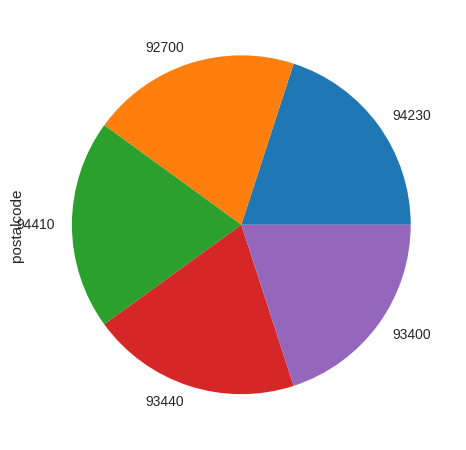

In [122]:
df.groupby('bluecars_taken_sum').head()['postalcode'].head().value_counts().plot.pie()

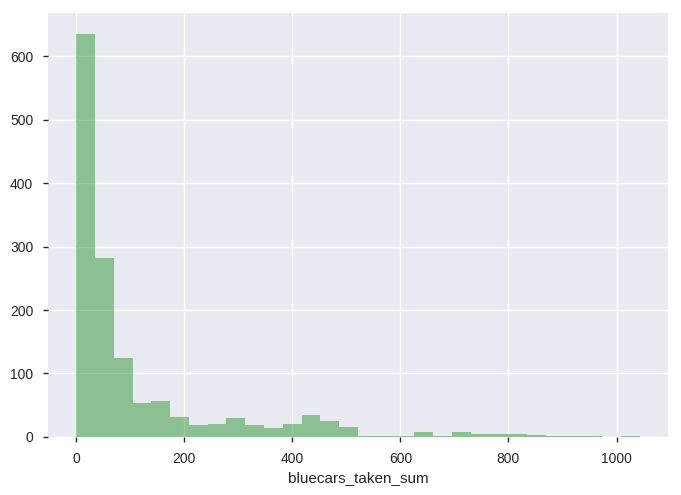

In [123]:
sns.distplot(df.bluecars_taken_sum, kde=False, bins = 30,color = 'green')

In [124]:
df.date.unique()

array(['4/5/2018', '1/12/2018', '1/1/2018', '4/18/2018', '4/10/2018',
       '5/4/2018', '5/21/2018', '1/10/2018', '5/7/2018', '5/23/2018',
       '3/27/2018', '6/14/2018', '2/8/2018', '6/5/2018', '6/1/2018',
       '1/19/2018', '3/6/2018', '1/15/2018', '2/6/2018', '4/25/2018',
       '5/30/2018', '6/11/2018', '2/2/2018', '6/19/2018', '1/31/2018',
       '3/20/2018', '4/26/2018', '2/9/2018', '2/20/2018', '2/13/2018',
       '5/25/2018', '1/16/2018', '4/20/2018', '1/26/2018', '4/16/2018',
       '2/19/2018', '1/5/2018', '6/7/2018', '6/13/2018', '4/4/2018',
       '3/2/2018', '1/3/2018', '5/2/2018', '4/6/2018', '3/23/2018',
       '3/29/2018', '1/2/2018', '4/23/2018', '1/29/2018', '2/15/2018',
       '3/30/2018', '3/21/2018', '5/29/2018', '1/8/2018', '2/23/2018',
       '1/17/2018', '2/1/2018', '3/13/2018', '6/4/2018', '3/1/2018',
       '2/12/2018', '3/16/2018', '5/22/2018', '4/27/2018', '5/1/2018',
       '4/24/2018', '3/19/2018', '4/3/2018', '4/12/2018', '6/6/2018',
       '4/17/2018'

# BIVARIATE ANALYSIS

# MULTIVARIATE ANALYSIS

# HYPOTHESIS TESTING

We will try to make a decision on our hypothesis with the claim we have.

H0: Is the number of bluecars taken in area X different from area Y?Is it greater in area X than in area Z?

In [130]:

#finding the population number
autolib.shape

(16085, 13)

In [0]:
#population = 16085
#sample = 2000
#significance level = 0.05%


In [131]:
#we will use the Z test since our population n>30.
#Firstly we need to chack for normality so as to perform the test

#AndersonDarling test
from scipy.stats import shapiro
data = autolib.bluecars_taken_sum
stat, p = shapiro(data)
print('statistics = %.3f, p = %.3f'%(stat, p))
#interpreting my test
alpha = 0.05
if p > alpha:
  print('gaussian sample')
else:
  print('not gaussian')
  



statistics = 0.661, p = 0.000
not gaussian


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


We will not use the z test
instead we will compare our claim using frequency tables.
our question compares the number of bluecars in different areas and whether they are equal or not.
We put to use: frequency tables, since this will give us a clear number of each postal code/area.
We'll take the first postal codes chosen from our random samples.
These are: 
94230
92700
93400	
94410
93440

In [143]:
df[df['postalcode'] ==94230 ].sum()
|#the bluecars taken from this postalcode is 540

postalcode                                                          1507680
date                      4/5/20184/23/20186/14/20185/24/20181/3/20185/2...
n_daily_data_points                                                   22979
dayofweek                                                                22
day_type                  weekdayweekdayweekdayweekdayweekdayweekdayweek...
bluecars_taken_sum                                                      540
bluecars_returned_sum                                                   573
utilib_taken_sum                                                         26
utilib_returned_sum                                                      26
utilib_14_taken_sum                                                      35
utilib_14_returned_sum                                                   41
slots_freed_sum                                                           0
slots_taken_sum                                                           0
dtype: objec

In [144]:
df[df['postalcode'] ==92700 ].sum()
#the bluecars in this postalcode is 881

postalcode                                                           834300
date                      1/12/20182/1/20184/18/20186/1/20183/1/20182/6/...
n_daily_data_points                                                   12578
dayofweek                                                                21
day_type                  weekdayweekdayweekdayweekdayweekdayweekdayweek...
bluecars_taken_sum                                                      881
bluecars_returned_sum                                                   900
utilib_taken_sum                                                         21
utilib_returned_sum                                                      23
utilib_14_taken_sum                                                      55
utilib_14_returned_sum                                                   52
slots_freed_sum                                                           0
slots_taken_sum                                                           0
dtype: objec

In [145]:
df[df['postalcode'] ==93400 ].sum()
#the bluecars in this postalcode is 1660

postalcode                                                          1401000
date                      1/1/20185/21/20184/25/20186/14/20184/16/20181/...
n_daily_data_points                                                   21569
dayofweek                                                                23
day_type                  weekdayweekdayweekdayweekdayweekdayweekdayweek...
bluecars_taken_sum                                                     1660
bluecars_returned_sum                                                  1668
utilib_taken_sum                                                         71
utilib_returned_sum                                                      69
utilib_14_taken_sum                                                     103
utilib_14_returned_sum                                                  108
slots_freed_sum                                                           0
slots_taken_sum                                                           0
dtype: objec

In [146]:
df[df['postalcode'] ==94410 ].sum()
#the bluecars in this postalcode is 334

postalcode                                                          1416150
date                      4/18/20185/4/20184/16/20184/4/20182/16/20185/2...
n_daily_data_points                                                   21469
dayofweek                                                                25
day_type                  weekdayweekdayweekdayweekdayweekdayweekdayweek...
bluecars_taken_sum                                                      336
bluecars_returned_sum                                                   322
utilib_taken_sum                                                          8
utilib_returned_sum                                                       9
utilib_14_taken_sum                                                      19
utilib_14_returned_sum                                                   23
slots_freed_sum                                                           0
slots_taken_sum                                                           0
dtype: objec

In [147]:
df[df['postalcode'] ==93440 ].sum()
#the bluecars in this postalcode is 27

postalcode                                                          1027840
date                      4/10/20181/31/20183/29/20183/26/20181/8/20183/...
n_daily_data_points                                                   15834
dayofweek                                                                12
day_type                  weekdayweekdayweekdayweekdayweekdayweekdayweek...
bluecars_taken_sum                                                       27
bluecars_returned_sum                                                    33
utilib_taken_sum                                                          1
utilib_returned_sum                                                       0
utilib_14_taken_sum                                                       2
utilib_14_returned_sum                                                    2
slots_freed_sum                                                           0
slots_taken_sum                                                           0
dtype: objec

We therefore accept the null hypothesis since the frequency tables show that the 5 postal codes have a different figure for the number of bluecars tgalen from the station.